## Data Preprocessing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
#loading the dataset
df = pd.read_csv('cities.csv')

In [4]:
#looking at the dataset loaded
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [5]:
#Basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
name_of_city                      493 non-null object
state_code                        493 non-null int64
state_name                        493 non-null object
dist_code                         493 non-null int64
population_total                  493 non-null int64
population_male                   493 non-null int64
population_female                 493 non-null int64
0-6_population_total              493 non-null int64
0-6_population_male               493 non-null int64
0-6_population_female             493 non-null int64
literates_total                   493 non-null int64
literates_male                    493 non-null int64
literates_female                  493 non-null int64
sex_ratio                         493 non-null int64
child_sex_ratio                   493 non-null int64
effective_literacy_rate_total     493 non-null float64
effective_literacy_rate_male      493 non-n

## Data Cleaning

### Checking for missing values

In [6]:
df.isnull().sum().sort_values(ascending=True)

name_of_city                      0
total_graduates                   0
location                          0
effective_literacy_rate_female    0
effective_literacy_rate_male      0
effective_literacy_rate_total     0
child_sex_ratio                   0
sex_ratio                         0
literates_female                  0
literates_male                    0
literates_total                   0
0-6_population_female             0
0-6_population_male               0
0-6_population_total              0
population_female                 0
population_male                   0
population_total                  0
dist_code                         0
state_name                        0
state_code                        0
male_graduates                    0
female_graduates                  0
dtype: int64

As we can see clearly, there are no missing values in any of the columns and rows

In [7]:
df.shape #helping us to know the count of rows and columns

(493, 22)

The loaded dataset contains 493 rows and 22 columns

There are some columns in the dataset which will be of no use, so we will remove them from the dataset. Some of these columns are state code, district code and many more.

## Removing insignificant columns

In [8]:
#Removing the insignificant columns
df_new = df.drop(['state_code','dist_code','location',], axis = 1)

In [9]:
df_new.describe()

,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [10]:
df_new.head()

,name_of_city,state_name,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
0,Abohar,PUNJAB,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,16287,8612,7675
1,Achalpur,MAHARASHTRA,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,8863,5269,3594
2,Adilabad,ANDHRA PRADESH,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,10565,6797,3768
3,Adityapur,JHARKHAND,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,19225,12189,7036
4,Adoni,ANDHRA PRADESH,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,11902,7871,4031


In [11]:
#from sklearn.preprocessing import StandardScaler
#cols_to_norm = ['population_total','population_male','population_female','0-6_population_total','0-6_population_male','0-6_population_female','literates_total','literates_male','literates_female','sex_ratio','child_sex_ratio','total_graduates','male_graduates','female_graduates']
#df_new[cols_to_norm] = StandardScaler().fit_transform(df_new[cols_to_norm])

In [12]:
#cols_to_norm = ['population_total','population_male','population_female','0-6_population_total','0-6_population_male','0-6_population_female','literates_total','literates_male','literates_female','sex_ratio','child_sex_ratio','total_graduates','male_graduates','female_graduates']
#df_new[cols_to_norm] = df_new[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [13]:
#df_new.head(10)

## Checking the frequency of different states in the dataset

In [14]:
df_new['state_name'].value_counts()

UTTAR PRADESH                63
WEST BENGAL                  61
MAHARASHTRA                  43
ANDHRA PRADESH               42
TAMIL NADU                   32
MADHYA PRADESH               32
GUJARAT                      29
RAJASTHAN                    29
BIHAR                        26
KARNATAKA                    26
HARYANA                      20
PUNJAB                       16
NCT OF DELHI                 15
JHARKHAND                    10
ORISSA                       10
CHHATTISGARH                  9
KERALA                        7
UTTARAKHAND                   6
ASSAM                         4
JAMMU & KASHMIR               3
PUDUCHERRY                    2
HIMACHAL PRADESH              1
NAGALAND                      1
MANIPUR                       1
MIZORAM                       1
TRIPURA                       1
MEGHALAYA                     1
CHANDIGARH                    1
ANDAMAN & NICOBAR ISLANDS     1
Name: state_name, dtype: int64

## Exploratory Data Analysis

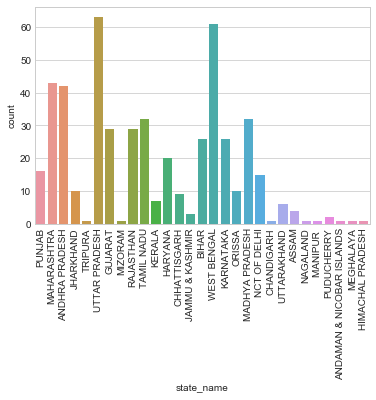

In [15]:
#Count plot
sns.countplot(x='state_name',data=df_new)
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 20

#### This bar graph tells us that the states like Uttar Pradesh and West Bengal have highest representation in this dataset with most cities

In [16]:
#City with top 5 populations
df_new.sort_values(by='population_total', ascending=False).head()

,name_of_city,state_name,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,MAHARASHTRA,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.70,1802371,964964,837407
141,Delhi,NCT OF DELHI,11007835,5871362,5136473,1209275,647938,561337,8583105,4776490,3806615,875,866,87.60,91.44,83.20,2221137,1210040,1011097
72,Bengaluru,KARNATAKA,8425970,4401299,4024671,862493,444639,417854,6775942,3664959,3110983,914,940,89.59,92.63,86.25,1591163,908363,682800
184,Greater Hyderabad,ANDHRA PRADESH,6809970,3500802,3309168,725816,373794,352022,5047705,2688111,2359594,945,942,82.96,85.96,79.79,1164149,685402,478747
7,Ahmadabad,GUJARAT,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,769858,435267,334591


## States with highest population

In [20]:
high_pop = df_new.groupby(by=['state_name'],as_index=False)['population_total'].sum()

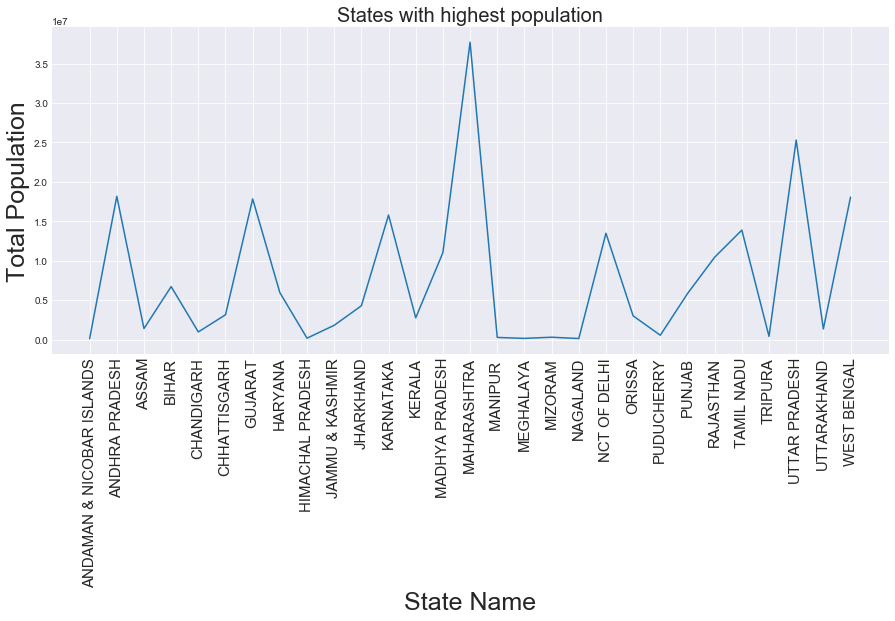

In [29]:
plt.subplots(figsize=(15,6))
plt.plot(high_pop.state_name, high_pop.population_total)
plt.xlabel('State Name')
plt.ylabel('Total Population')
plt.title('States with highest population',fontsize=20)
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 25
plt.show()

## States with highest graduates

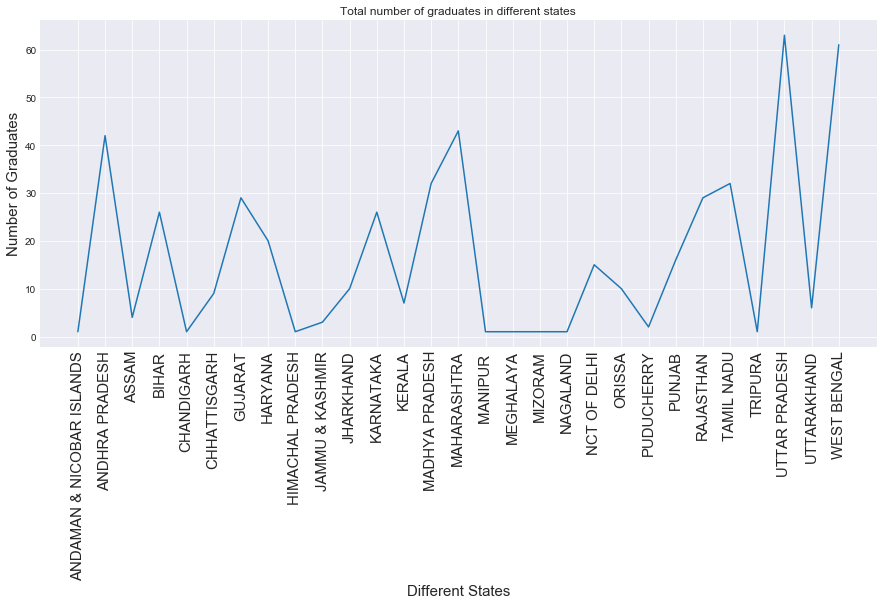

In [27]:
grads = df_new.groupby(by=['state_name'], as_index=False)['total_graduates'].count()

plt.subplots(figsize=(15,6))
plt.plot(grads.state_name, grads.total_graduates)
plt.xticks(rotation=90)
plt.xlabel('Different States')
plt.ylabel('Number of Graduates')
plt.title('Total number of graduates in different states')
plt.show()